![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [43]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

DR_NO  Date Rptd  ...  Status Desc                                 LOCATION
0  220314085 2022-07-22  ...  Invest Cont  2500 S  SYCAMORE                     AV
1  222013040 2022-08-06  ...  Invest Cont  3300    SAN MARINO                   ST
2  220614831 2022-08-18  ...  Invest Cont                        1900    TRANSIENT
3  231207725 2023-02-27  ...  Invest Cont  6200    4TH                          AV
4  220213256 2022-07-14  ...  Invest Cont  1200 W  7TH                          ST

[5 rows x 12 columns]

In [44]:
crimes.describe()

DR_NO       Vict Age
count  1.857150e+05  185715.000000
mean   2.255781e+08      39.999257
std    5.017438e+06      15.450227
min    2.009072e+08       2.000000
25%    2.210108e+08      28.000000
50%    2.220114e+08      37.000000
75%    2.310044e+08      50.000000
max    2.399097e+08      99.000000

In [45]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [46]:
#Rename columns
crimes.columns = crimes.columns.str.replace(' ', '_')
crimes.columns = [col.lower() for col in crimes.columns]
# first 2 char from time occ to be hour occ
crimes['hour_occ'] = crimes['time_occ'].str[:2].astype(int)
crimes.head()

dr_no  date_rptd  ...                                 location hour_occ
0  220314085 2022-07-22  ...  2500 S  SYCAMORE                     AV       11
1  222013040 2022-08-06  ...  3300    SAN MARINO                   ST       16
2  220614831 2022-08-18  ...                        1900    TRANSIENT       12
3  231207725 2023-02-27  ...  6200    4TH                          AV        6
4  220213256 2022-07-14  ...  1200 W  7TH                          ST        9

[5 rows x 13 columns]

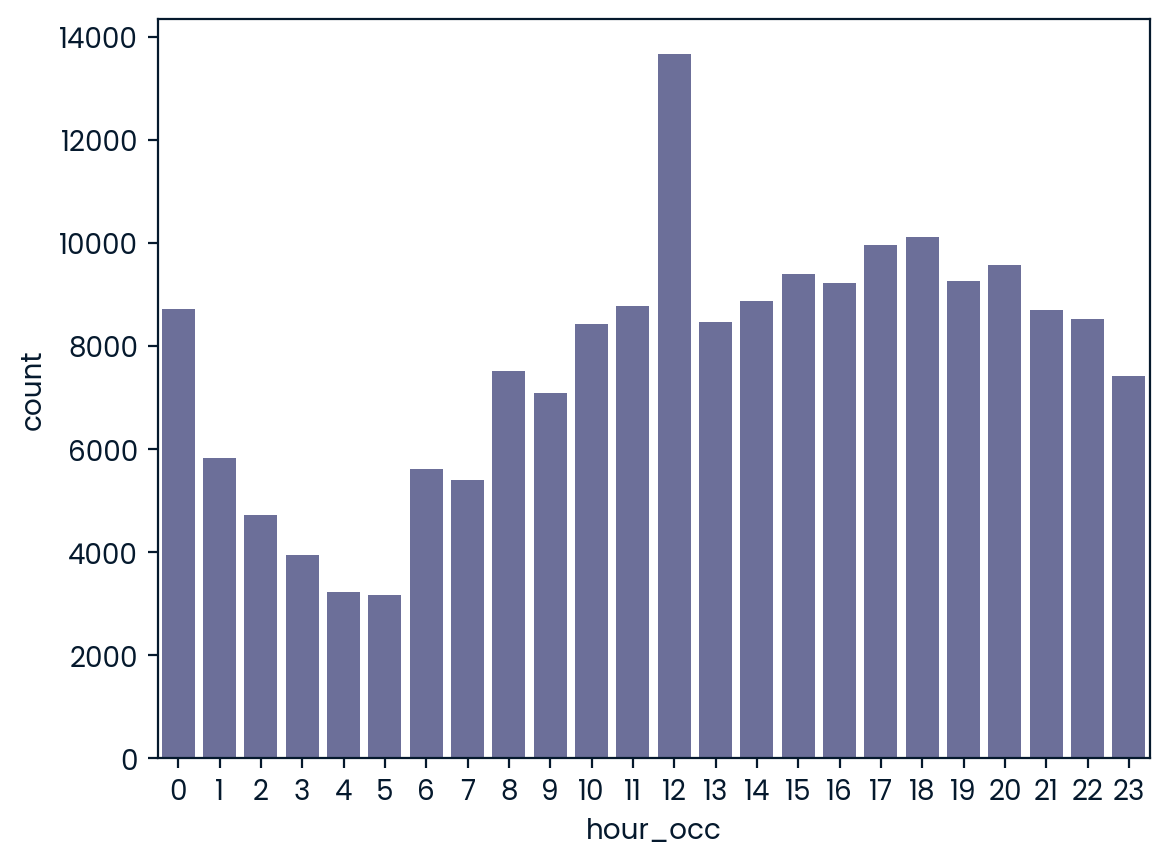

In [47]:
# visualize hour with most frew
sns.countplot(data=crimes, x='hour_occ')
plt.show()

In [48]:
highest_hour_frequency_of_crimes = crimes['hour_occ'].value_counts().max()

peak_crime_hour = 12    
    
print('Highest frequency of crimes is {0} with {1} frequent'.format(peak_crime_hour, highest_hour_frequency_of_crimes ) )

Highest frequency of crimes is 12 with 13663 frequent


In [49]:
#  area has the largest frequency of night crimes 


In [50]:
night_time = crimes[crimes["hour_occ"].isin([22,23,0,1,2,3])]

In [51]:
night_time.groupby("area_name", as_index=False)["hour_occ"].count().sort_values("hour_occ", ascending=False)

area_name  hour_occ
1       Central      3312
6     Hollywood      2699
0   77th Street      2558
15    Southwest      2347
14    Southeast      2218
9        Newton      2142
11      Olympic      2137
12      Pacific      1916
13      Rampart      1860
8   N Hollywood      1855
20     Wilshire      1716
10    Northeast      1684
17     Van Nuys      1629
19  West Valley      1520
16      Topanga      1461
7       Mission      1453
4        Harbor      1384
18      West LA      1369
2    Devonshire      1348
5    Hollenbeck      1315
3      Foothill      1260

In [52]:
peak_night_crime_location = night_time.groupby("area_name", as_index=False)["hour_occ"].count().sort_values("hour_occ", ascending=False).iloc[0]["area_name"]
print(peak_night_crime_location)

Central


In [53]:
print('Area has the largest frequency of night crimes is', peak_night_crime_location)

Area has the largest frequency of night crimes is Central


In [54]:
crimes['age_bracket'] = pd.cut(crimes['vict_age'], bins=[0, 17, 25, 34, 44, 54, 64, np.inf], labels=["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"])
victim_ages = crimes['age_bracket'].value_counts()
print(victim_ages)

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: age_bracket, dtype: int64
